In [90]:
import pandas as pd
import seaborn as sns
from pytrends.request import TrendReq


class GoogleTrends:    
    def __init__(self, username: str = None):
        if username:
            self.user = None
            
            try:
                user = Users.objects.get(name=username)
            except ValueError:
                user = Users.objects.create(name=username)
            
        self._collection = list()
        
        # initiates Google connection
        self.pytrends = TrendReq(hl='en-US', tz=360)

    def get_response(self, keywords: list,
                     collect: bool=True,
                     **kwargs):
        """Default keyword arguments are used, unless chosen my user. 
        Search must have at least one keyword and can have up to 5
        parameters: timeframe, geo, cat, tz, gprop"""
        if not keywords:
            return None
        
        # timeframe syntax 
        self.pytrends.build_payload(kw_list=keywords,
                                    **kwargs)
        response = self.pytrends.interest_over_time()
        
        if collect:
            self._collection.append(response)
            
        return response
    
    def plot_response(self, response):
        # use seaborn or plotly to plot simple time graph
        
        # reset for multi-level index
        response = response.reset_index()
        
        sns.set()
        plot = sns.lineplot(x="date", 
                            y=reponse.columns[1],
                            data=response)
        return plot
    
    def create_report(self, response):
        
#         df = response.drop(columns=['isPartial'])
        # creates a csv report of the data from the request
        filename = 'InterestOverTime{}.csv'.format(1)

        if self.cat:
            cat_header = 'Category: ' + self.cat.name
        else:
            cat_header = 'Category: All categories'
            
        with open(filename, "w") as f:
            f.write(cat_header)
            f.write('\n')
        
        report = response.to_csv(filename, 
                                 columns=[response.columns[1], response.columns[2]],
                                 sep=',', 
                                 encoding='utf-8', 
                                 index=False, 
                                 mode='a')
        report = dfinal.to_csv(t, index=False, mode='a')
        return report
        

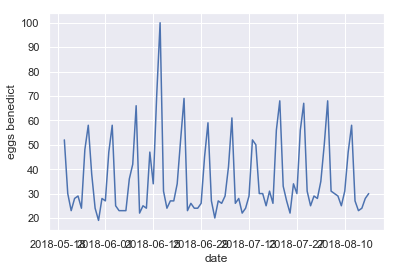

In [88]:
kw = ['eggs benedict']

trending = GoogleTrends()
trending_reponse = trending.get_response(kw, timeframe='today 3-m')
# trending_plot = trending.plot_response(trending_reponse)
trending_reponse = trending_reponse.reset_index()
# print(trending_reponse.columns)
sns.lineplot(x="date", y=kw[0], data=trending_reponse)


In [91]:
trending.create_report(trending_reponse)